# **Práctica 2**: Señales de tráfico

---

## Enunciado

La empresa X quiere diseñar un sistema para **clasificar distintas señales** de tráfico. En concreto X quiere desarrollar un sistema que, basándose en las **imágenes** capturadas por un coche autónomo, identifique el **tipo de señal **entre las posibles.

Por una parte ya existe un equipo que se encarga de la **segmentación** de las señales en carretera. De esta manera se recorta **únicamente** el cartel del resto de elementos inservibles.

Los **únicos datos disponibles** que la empresa tiene están en el archivo *pickle* llamado ***signal_dataset.pkl***. Este contiene una serie de imágenes las representan las distintas señales que los coches capturan.

Se pide:

* **Identificar** el tipo de problema con el que se está tratando.
* **Procesar** los datos para que puedan ser tratados por la Inteligencia Artificial de manera adecuada. Este procesamiento deberá **sacar el mayor provecho** de la información de las imágenes.
* Desarrollar un algoritmo de **Machine Learning** que **separe** las imágenes del dataset dependiendo del tipo de señal que representen. Además se pide que se justifiquen las clases identificadas en la medida de lo posible.
* **Justificar** las decisiones tomadas en cada momento.

**NO** será necesario:

* **Evaluar** el rendimiento del algoritmo.

---

## Evaluación

Se evaluará la práctica de la siguiente manera:

* **Identificación del problema** (50%): El alumno deberá identificar el problema al que se enfrenta, de entre los tipos de problemas vistos en clase. Deberá justificar el por qué de dicha identificación.
* **Diseño de algoritmos de ML** (30%): Se corregirá la adecuación de el(los) algoritmo(s) escogido(s) para solucionar el problema en cuestión, así como posibles elecciones de hiperparámetros.
* **Procesado de los datos** (20%): Se evaluará positivamente un correcto estudio del conjunto de datos con el que se está tratando, así como un preprocesamiento en caso de ser necesario.

El alumno deberá entregar el **presente notebook** con el nombre *{apellido1_nombre}_Practica_2.ipynb*  a la tarea de Moodle correspondiente. En dicho notebook deberá **aparecer** el **código con el que se resuelve el problema** así como las **justificaciones, decisiones y aclaraciones** del mismo.

Recordar que el alumno deberá **responder explícitamente** a las preguntas de identificacion, diseño y procesado.

# Nueva sección

In [2]:
import pickle
import cv2
import numpy as np

# Carga de datos

Recordar subir el archivo *signal_dataset.pkl* para poder acceder a él.

En el objeto *X_orig* se tendrá una lista de imágenes con las imágenes del dataset.

In [3]:
filehandler = open('signal_dataset.pkl', 'rb')
X_orig = pickle.load(filehandler)
X_orig.shape

(877, 64, 64, 3)

---

Creado por **Guillermo Iglesias** (guillermo.iglesias@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">

Estamos ante un problema de aprendizaje no supervisado, puesto que nuestro dataset no tiene etiquetas, es decir, debemos entrenar un modelo que nos diga él, por así decir, la etiqueta de cada señal. Basicamente, tenemos que utilizar clustes para, a partir de los datos que tenemos, que nos haga una clasificación en los 4 tipos de señales que hay en el dataset.

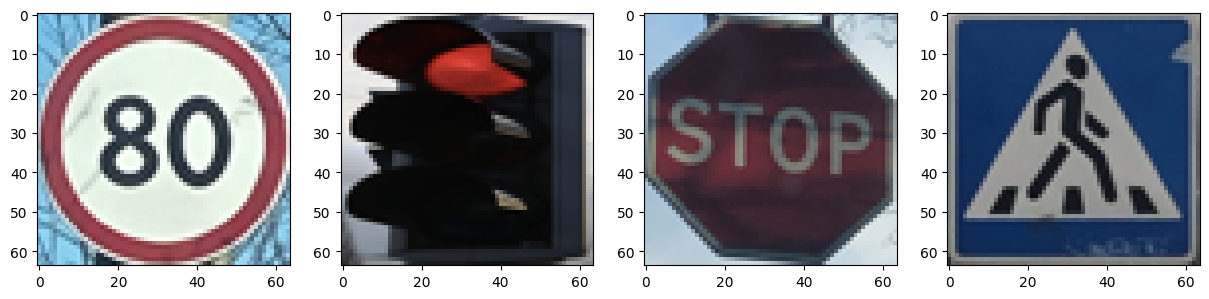

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=[15,5])

ax[0].imshow(X_orig[0,:,:,:], cmap='gray')
ax[1].imshow(X_orig[150,:,:,:], cmap='gray')
ax[2].imshow(X_orig[250,:,:,:], cmap='gray')
ax[3].imshow(X_orig[300,:,:,:], cmap='gray')

plt.show()

Hay 4 tipos de señales: de velocidad, semaforo, stop y paso de cebra, pues entonces el objetivo de nuestro modelo es que agrupe los datos que tiene en 4 cúmulos.

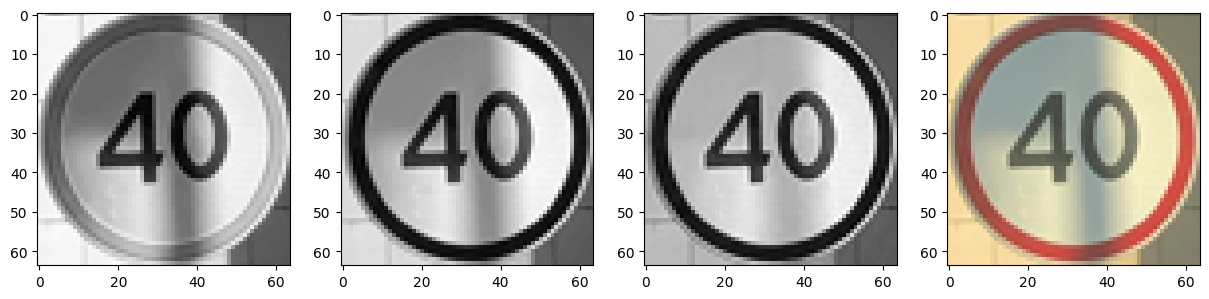

In [5]:
fig, ax = plt.subplots(1, 4, figsize=[15,5])

ax[0].imshow(X_orig[1,:,:,0], cmap='gray')
ax[1].imshow(X_orig[1,:,:,1], cmap='gray')
ax[2].imshow(X_orig[1,:,:,2], cmap='gray')
ax[3].imshow(X_orig[1,:,:,:], cmap='gray')

plt.show()

Aquí probe un poco ver como estaban los arrays, son 877 imagenes de 64x64 píxeles y con 3 canales de color

In [6]:
print("Tipo de objeto de imagen: ", type(X_orig))
print("Dimensiones de la imagen: ", np.shape(X_orig))
print("Valor máximo: ", X_orig.max())
print("Valor mínimo: ", X_orig.min())

Tipo de objeto de imagen:  <class 'numpy.ndarray'>
Dimensiones de la imagen:  (877, 64, 64, 3)
Valor máximo:  255
Valor mínimo:  0


Vamos a normalizar el valor de los pixeles entre 0 y 1

In [7]:
X_orig = X_orig/255
print("Valor maximo ahora: ", X_orig.max())
print("Valor minimo ahora: ", X_orig.min())

Valor maximo ahora:  1.0
Valor minimo ahora:  0.0


Confirmo que sigue viendose bien la imagen:

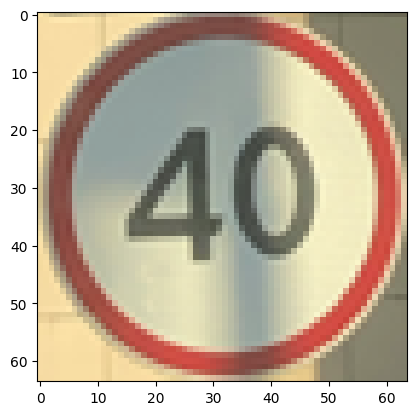

In [8]:
plt.imshow(X_orig[1])

Aquí decido pasar la imagen a blanco y negro, un solo canal de color, para que sea más fácil para mi modelo trabajar con ello.

In [9]:
X_bw = np.zeros((X_orig.shape[0], X_orig.shape[1], X_orig.shape[2], 1), dtype=np.uint8)

for i in range(X_orig.shape[0]):

  imagen_convertida = cv2.convertScaleAbs(X_orig[i, :, :, :])
  X_bw[i, :, :, 0] = cv2.cvtColor(imagen_convertida[:, :, :], cv2.COLOR_RGB2GRAY)


Confirmo que se me ha quedado con un solo canal de color y miro como queda

In [10]:
X_bw.shape

(877, 64, 64, 1)

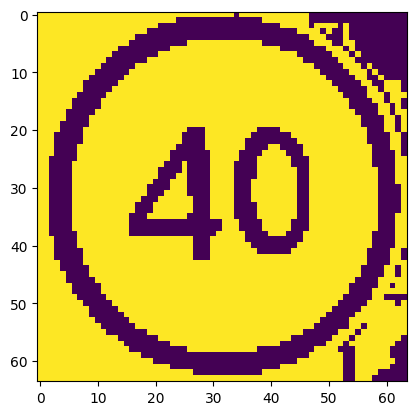

In [11]:
plt.imshow(X_bw[1,:,:,:])
plt.show()

Aquí, una vez he decidido que voy a usar el algoritmo k-means, dejo el array aplanado por así decir, para poder introducirlo en el modelo que ya viene hecho por la libreria sklearn:

In [12]:
X_bw = X_bw[:,:,:,0]

In [13]:
X_bw_plano = X_bw.reshape(877,-1)

In [14]:
X_bw_plano.shape

(877, 4096)

Entreno el modelo kmeans definido ya por la libreria:

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state=0)
kmeans.fit(X_bw_plano)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

Obtengo los centroides que me ha devuelto mi algoritmo y veo que tienen el mismo formato que los datos que yo le he pasado así que vamos a redimensionarlos de vuelta para mostrarlos por pantalla.

In [16]:
kmeans.cluster_centers_

array([[0.91712707, 0.92265193, 0.92265193, ..., 0.79005525, 0.80662983,
        0.79558011],
       [0.22119816, 0.19815668, 0.19354839, ..., 0.17050691, 0.17050691,
        0.17511521],
       [0.3622449 , 0.3622449 , 0.37244898, ..., 0.24489796, 0.22959184,
        0.24489796],
       [0.93286219, 0.93992933, 0.93639576, ..., 0.86925795, 0.86572438,
        0.86219081]])

In [17]:
kmeans.cluster_centers_.shape

(4, 4096)

In [18]:
centroids = kmeans.cluster_centers_

Aquí cojo los 4 centroides que se corresponden con las 4 señales o las 4 tipos de etiqueta en los que mi algoritmo ha intendado dividir mi dataset y los redimensiono a los 64 pixeles iniciales que tenían para enseñarlos por pantalla

In [19]:
signal_1 = centroids[0].reshape(64,64)

In [20]:
signal_2 = centroids[1].reshape(64,64)

In [21]:
signal_3 = centroids[2].reshape(64,64)

In [22]:
signal_4 = centroids[3].reshape(64,64)

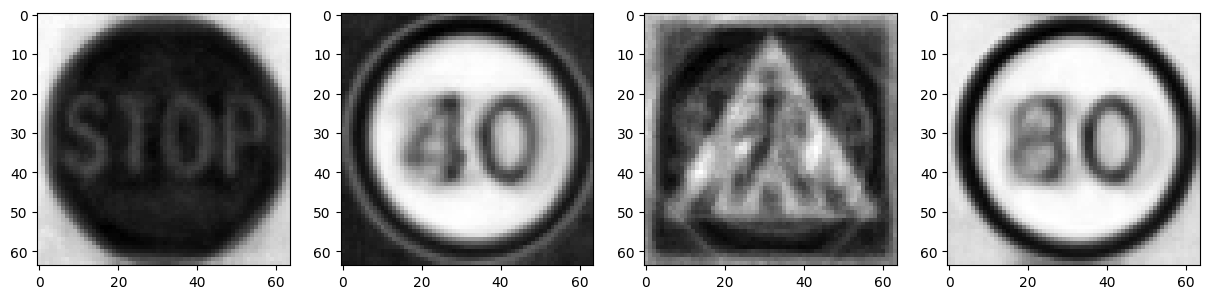

In [23]:
fig, ax = plt.subplots(1, 4, figsize=[15,5])

ax[0].imshow(signal_1[:,:], cmap='gray')
ax[1].imshow(signal_2[:,:], cmap='gray')
ax[2].imshow(signal_3[:,:], cmap='gray')
ax[3].imshow(signal_4[:,:], cmap='gray')

plt.show()

Como vemos, ha conseguido clasificar en casi 3 tipos de señal: señal de stop, señal de velocidad y casi señal de paso de cebra ya que aparece un poco mezclada con la de stop. Es lo malo del lenguaje no supervisado, que no controlas el output. El caso del kmeans tiene como limitación que solo puede separar los datos de forma lineal y es una limitación bastante grande y además la máquina no tiene forma de evaluar que lo está haciendo bien, estas dos cosas unidas hacen que sea normal no obtener de forma precisa la clasificación en 4 que deseabamos